In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import bias df

bias_df = pd.read_csv('results/bias.csv')
bias_df

,Unnamed: 0,Model,Total_Bias,Abs_Bias,Effect_Size
0,0,pretrained,0.659705,0.659705,0.659705
1,1,original,0.000000,0.000000,0.000000
2,2,neutral,0.000000,0.000000,0.000000
3,3,mix,0.425061,0.479115,0.452088


/tmp/ipykernel_5027/2581359931.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data = bias_df, x = "Model", y = "Bias_Value", hue = "Bias_Type", palette = cmap)


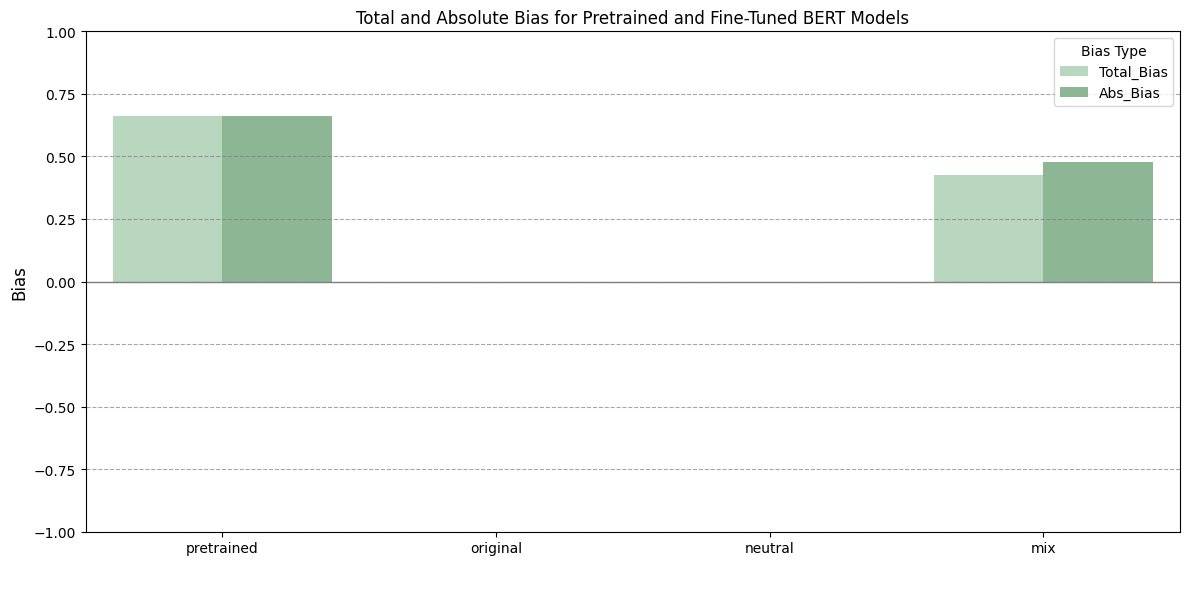

In [6]:
cmap = sns.cubehelix_palette(start = 2, rot = 0, dark = 0.1, light = 0.8) # reverse=True

# Combine the total and abs bias in the same plot
bias_df = bias_df.melt(id_vars = ["Model"],
                        value_vars = ["Total_Bias", "Abs_Bias"],
                        var_name = "Bias_Type",
                        value_name = "Bias_Value")

model_order = ["pretrained", "original", "neutral", "mix"]
bias_df["Model"] = pd.Categorical(bias_df["Model"], categories = model_order, ordered = True)

# Create the plot
plt.figure(figsize = (12, 6))

# Plot both total and abs bias
sns.barplot(data = bias_df, x = "Model", y = "Bias_Value", hue = "Bias_Type", palette = cmap)

# Add horizontal line at y = 0 indicating 0 bias
plt.axhline(0, color = 'gray', linewidth = 1)

# Set y-axis range from -1 to 1
plt.ylim(-1, 1)

# Add labels and title
plt.title('Total and Absolute Bias for Pretrained and Fine-Tuned BERT Models', fontsize = 12)
plt.ylabel('Bias', fontsize = 12)
plt.xlabel(' ', fontsize = 12)

# Display legend and adjust plot
plt.legend(title = "Bias Type", loc = 'upper right')
plt.tight_layout()

# Add horizontal grid lines
plt.grid(True, axis = 'y', linestyle = '--', color = 'gray', alpha = 0.7)

# Show the plot
plt.tight_layout()
plt.show()
